"Author; Sharon Veerayah"

# STOCHASTIC ODEs

In [1]:
# generate random integer values
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
%matplotlib inline
from random import seed
from random import randint

In [2]:
#Random numbers N(0, 1)
np.random.normal(0, 1)


-0.12617960200754427

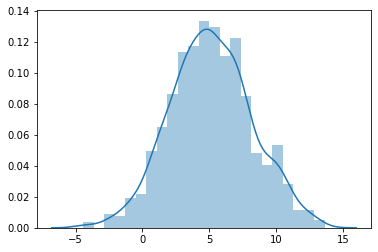

In [3]:
value = np.random.normal(loc=5,scale=3,size=1000)
sns.distplot(value)

In [404]:
randN=np.random.normal(0, 1)
randN

-0.6919128457382869

# ============================================================

# Stochastic ODE for  $rx - x^3$
Sharon

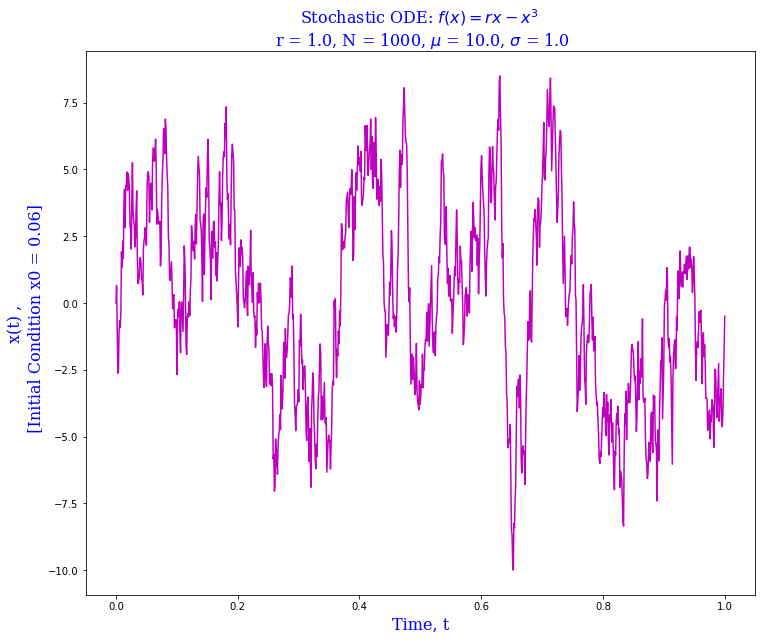

In [440]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }
N = 1000
dt = 0.001
T = 1.  # Total time.
t = np.linspace(0., T, N) #  time axis
mu = 10.0
sigma = 1.0
r = 1.

x = np.zeros(N)
x0 = np.random.normal(loc=0.0,scale=1.0) # initial condition

diffusion = lambda x,t: sigma # define diffusion term
dW_t = np.random.normal(loc=0.0,scale=1.0,size=N) #define noise 

# solve SDE
for i in range(1,N):
    x[i] = x[i-1] + (r*x[i-1] - x[i-1]*x[i-1]*x[i-1])*dt + diffusion(x[i-1],i*dt)*dW_t[i]

plt.plot(t,x, 'm')
plt.title('Stochastic ODE: $f(x) = rx - x^{3} $ \n r = '+ str(r) + ', N = '+ str(N) + ', $\mu$ = ' + str(mu) + \
          ', $\sigma$ = ' + str(sigma) ,  fontdict=font ) 
plt.ylabel('x(t) ' + ',\n  [Initial Condition x0 = ' + str(round(x0, 2)) +']',  fontdict=font)
plt.xlabel('Time, t',  fontdict=font)
plt.show()


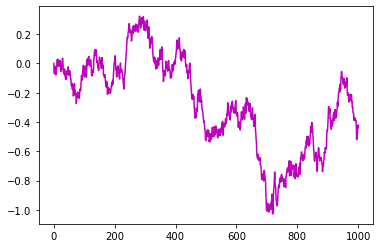

In [433]:
from kramersmoyal import km, kernels

t_final = 1.
dt = 0.001
sigma = 1.0

# The time array
time = np.arange(0, t_final, dt)

# Initialise
x = np.zeros(time.size)

# Generate a Wiener process
dw = np.random.normal(loc = 0, scale = np.sqrt(dt), size = time.size)

# Integrate the process
for i in range(1,time.size):
    x[i] = x[i-1] - (r*x[i-1] - x[i-1]*x[i-1]*x[i-1])*dt + sigma*dw[i]
    
plt.plot(t,x, 'm')
    

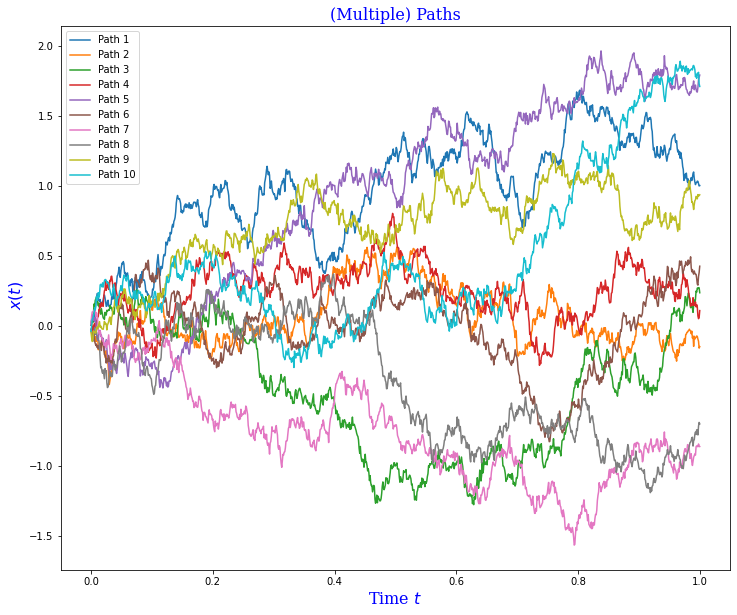

In [388]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }
       
T = 1.
N = 1000 # Number of points
dt = 0.001 # Time step
t = np.linspace(0,T,N)
M = 10 # Number of random paths
x = np.zeros(N)
r= 1.5
dX = np.sqrt(dt)*np.random.randn(M, N)
X = x + (r*x - x*x*x)*dt + np.cumsum(dX, axis=1)

for i in range(M):
    plt.plot(t, X[i,:], label = "Path " + str(i+1) )
  
  
plt.xlabel('Time $t$', fontdict=font)
plt.ylabel(' $x(t)$', fontdict=font)
plt.title('(Multiple) Paths', fontdict=font)
axes = plt.gca()
plt.legend(loc = 2)
plt.show()

In [450]:
    from scipy import linspace
    from scipy.integrate import solve_ivp
    import matplotlib.pyplot as plt
r=1.0
    def ode(t, z):
        x, xp = z
        return [xp, r*x -x**3]

    a, b = 0, 100
    t = np.linspace(a, b, 900)

    sol1 = solve_ivp(ode, [a, b], [0.02, 0], t_eval=t)
    sol2 = solve_ivp(ode, [a, b], [0.05, 0], t_eval=t)

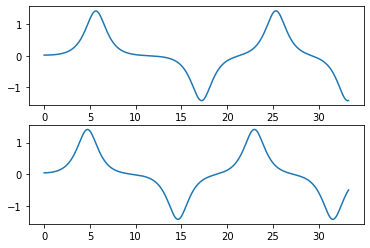

In [451]:
    plt.subplot(211)
    plt.plot(sol1.t[:300], sol1.y[0][:300])
    plt.subplot(212)
    plt.plot(sol2.t[:300], sol2.y[0][:300])
    plt.show()

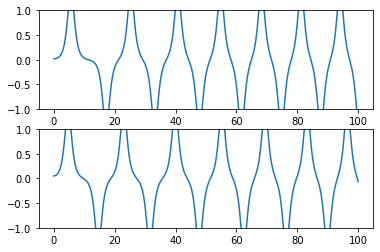

In [452]:
    plt.subplot(211)
    plt.plot(sol1.t, sol1.y[0])
    plt.ylim([-1,1])
    plt.subplot(212)
    plt.plot(sol2.t, sol2.y[0])
    plt.ylim([-1,1])
    plt.show()

# =============================================================

# SIMULATE SDE: Ornstein-Uhlenbeck 

Simulate an Ornstein-Uhlenbeck process, which is a solution of the Langevin equation.

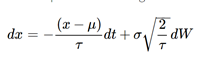

https://ipython-books.github.io/134-simulating-a-stochastic-differential-equation/

Text(0, 0.5, 'x')

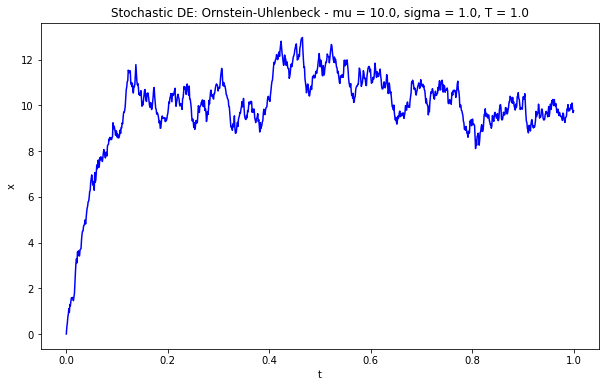

In [219]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#PARAMETERS
mu = 10.  # Mean.
sigma = 1.  # Standard deviation.
tau = .05  # Time constant.
#SIMULATION PARAMETERS
dt = .001  # Time step.
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.
#RENORMALIZED VARIABLES
sigma_bis = sigma*np.sqrt(2./tau)
sqrtdt = np.sqrt(dt)
S = sigma_bis * sqrtdt
dW = np.random.randn()
#VECTOR of successive values of our process during the simulation
x = np.zeros(n)

#EULER-MARUYAMA-like the Euler method for ODEs w/ extra stochastic term random N(0,1)
for i in range(n - 1):
    x[i + 1] = x[i] + dt*(-(x[i] - mu)/tau) + sigma_bis*sqrtdt*np.random.randn()
    
#PLOT
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(t, x, 'b')
plt.title('Stochastic DE: Ornstein-Uhlenbeck - ' + 'mu = '+ str(mu) + ', sigma = ' + str(sigma) + ', T = ' + str(T))
plt.xlabel('t') # set x-axis label
plt.ylabel('x') # set y-axis label


Text(0, 0.5, 'x')

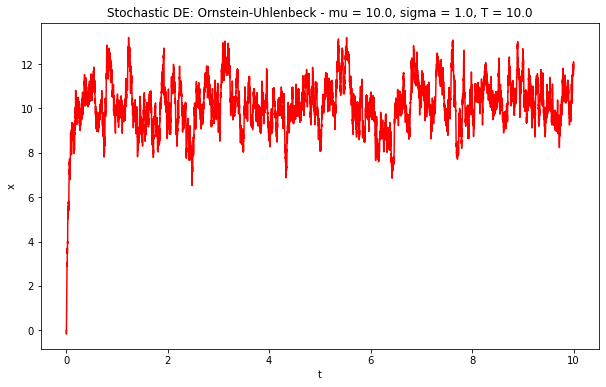

In [224]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#PARAMETERS
mu = 10.  # Mean.
sigma = 1.  # Standard deviation.
tau = .05  # Time constant.
#SIMULATION PARAMETERS
dt = .001  # Time step.
T = 10.  # Total time.
n = int(T/dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.
#RENORMALIZED VARIABLES
sigma_bis = sigma*np.sqrt(2./tau)
sqrtdt = np.sqrt(dt)
#VECTOR of successive values of our process during the simulation
x = np.zeros(n)
S = sigma_bis * sqrtdt
dW = np.random.randn()

#EULER-MARUYAMA-like the Euler method for ODEs w/ extra stochastic term random N(0,1)
for i in range(n - 1):
    x[i + 1] = x[i] + dt*(-(x[i] - mu) / tau) + sigma_bis * sqrtdt * np.random.randn()
    
#PLOT
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(t, x, 'r')
plt.title('Stochastic DE: Ornstein-Uhlenbeck - ' + 'mu = '+ str(mu) + ', sigma = ' + str(sigma) + ', T = ' + str(T))
plt.xlabel('t') # set x-axis label
plt.ylabel('x') # set y-axis label


# HIstogram

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


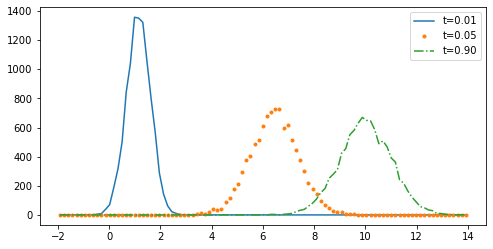

In [225]:
ntrials = 10000
X = np.zeros(ntrials)
# We create bins for the histograms.
bins = np.linspace(-2., 14., 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i in range(n):
    # We update the process independently for
    # all trials
    X += dt * (-(X - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn(ntrials)
    # We display the histogram for a few points in
    # time
    if i in (5, 50, 900):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {5: '-', 50: '.', 900: '-.', }[i],
                label=f"t={i * dt:.2f}")
    ax.legend()

# f(x) = rx - xx*x for various r

Text(0, 0.5, 'x')

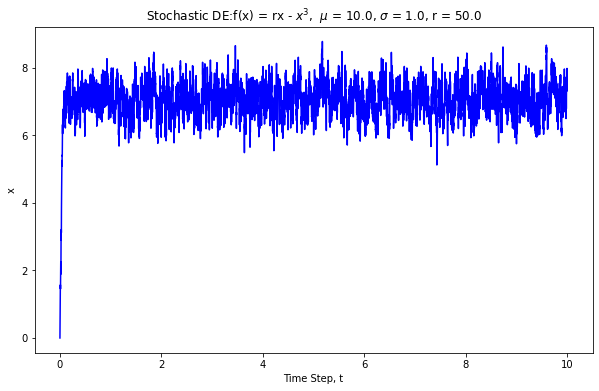

In [314]:
#EULER-MARUYAMA-like the Euler method for ODEs w/ extra stochastic term random N(0,1)

#PARAMETERS
mu = 10.  # Mean.
sigma = 1.0  # Standard deviation.
tau = .05  # Time constant.
#SIMULATION PARAMETERS
dt = 0.001  # Time step.
T = 10.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.
#RENORMALIZED VARIABLES
sigma_b = sigma*np.sqrt(2./tau)
sqrtdt = np.sqrt(dt)
#VECTOR of successive values of our process during the simulation
x = np.zeros(n)
S = sigma_b*sqrtdt

r= 50.0

for i in range(n - 1):
    x[i + 1] = x[i] + dt*(r*x[i] - x[i]*x[i]*x[i]) + S*np.random.normal()
    
    
fig, ax = plt.subplots(1, 1,  figsize=(10, 6))
ax.plot(t, x, 'b')
plt.title('Stochastic DE:f(x) = rx - $x^{3}$, ' + ' $\mu$ = '+ str(mu) + ', $\sigma$ = ' + str(sigma) + ', r = ' + str(r))
plt.xlabel('Time Step, t') # set x-axis label
plt.ylabel('x') # set y-axis label

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


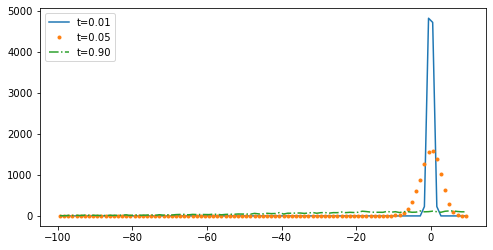

In [250]:
N_trials = 10000
X = np.zeros(N_trials)
# We create bins for the histograms.
bins = np.linspace(-100., 14., 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i in range(n):
    # We update the process independently for
    # all trials
    X += dt * (r*x - x*x*x) + sigma_bis * sqrtdt * np.random.randn(N_trials)
    # We display the histogram for a few points in
    # time
    if i in (5, 50, 900):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {5: '-', 50: '.', 900: '-.', }[i],
                label=f"t={i * dt:.2f}")
    ax.legend()

<img src="files/SDE1.png" width="800" height="400">

# Drift-Diffusion

# https://www.pik-potsdam.de/members/franke/lecture-sose-2016/introduction-to-python.pdf

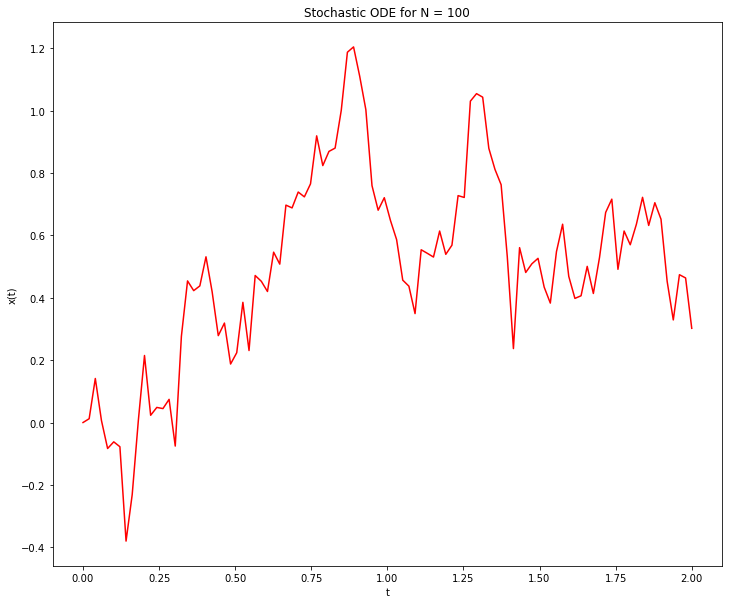

In [257]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
t_0 = 0 # define model parameters
t_end = 2
N = 100
theta = 1.1
mu = 0.0
sigma = 1.0
t = np.linspace(t_0,t_end,N) # define time axis
dt = np.mean(np.diff(t))
x = np.zeros(N)
x0 = np.random.normal(loc=0.0,scale=1.0) # initial condition
drift = lambda x,t: theta*(mu-x) # define drift term, google to learn about lambda
diffusion = lambda x,t: sigma # define diffusion term
noise = np.random.normal(loc=0.0,scale=1.0,size=N)*np.sqrt(dt) #define noise process
# solve SDE
for i in range(1,N):
    x[i] = x[i-1] + drift(x[i-1],i*dt)*dt + diffusion(x[i-1],i*dt)*noise[i]

plt.plot(t,x, 'r')

plt.title('Stochastic ODE for N = '+ str(N) )
plt.ylabel('x(t)')
plt.xlabel('t')
plt.show()


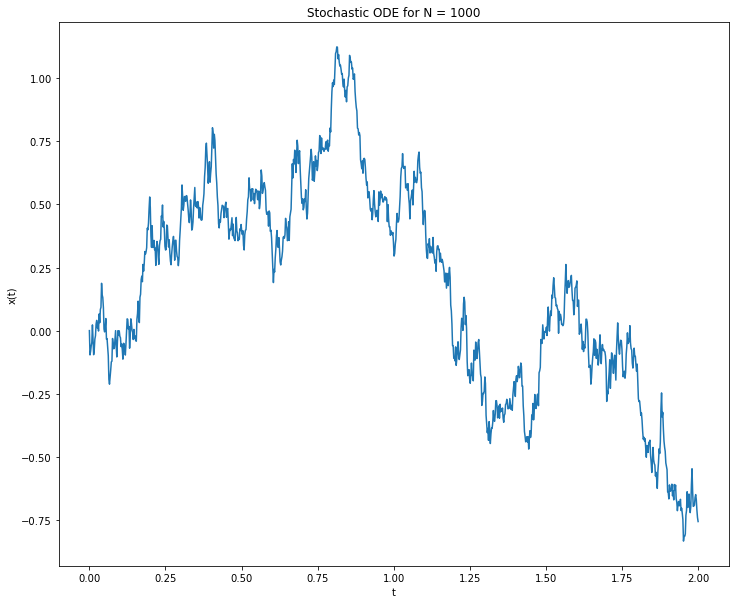

In [255]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
t_0 = 0 # define model parameters
t_end = 2
N = 1000
theta = 1.1
mu = 0.0
sigma = 1.0
t = np.linspace(t_0,t_end,N) # define time axis
dt = np.mean(np.diff(t))
x = np.zeros(N)
x0 = np.random.normal(loc=0.0,scale=1.0) # initial condition
drift = lambda x,t: theta*(mu-x) # define drift term, google to learn about lambda
diffusion = lambda x,t: sigma # define diffusion term
noise = np.random.normal(loc=0.0,scale=1.0,size=N)*np.sqrt(dt) #define noise process
# solve SDE
for i in range(1,N):
    x[i] = x[i-1] + drift(x[i-1],i*dt)*dt + diffusion(x[i-1],i*dt)*noise[i]

plt.plot(t,x)
plt.title('Stochastic ODE for N = '+ str(N) )
plt.ylabel('x(t)')
plt.xlabel('t')
plt.show()




In [306]:
x0 = np.random.normal(loc=0.0,scale=1.0)
x0

-1.7011066642458443

#################################
# implement the Euler–Maruyama method 

In [21]:
#N     : The number of timesteps/iteration - default = 100
#t0    : The initial time of the solution - default t = 0
#DW    : The Wiener function in lambda notation - np.random number generator  
#alfa and beta  : a lambda function : X state and t time
#X0    : Initial conditions of the SDE.Using N (0,1) np.random
#dt    : The timestep of the solution               

# OVERALL 

http://people.bu.edu/andasari/courses/stochasticmodeling/lecture5/stochasticlecture5.html

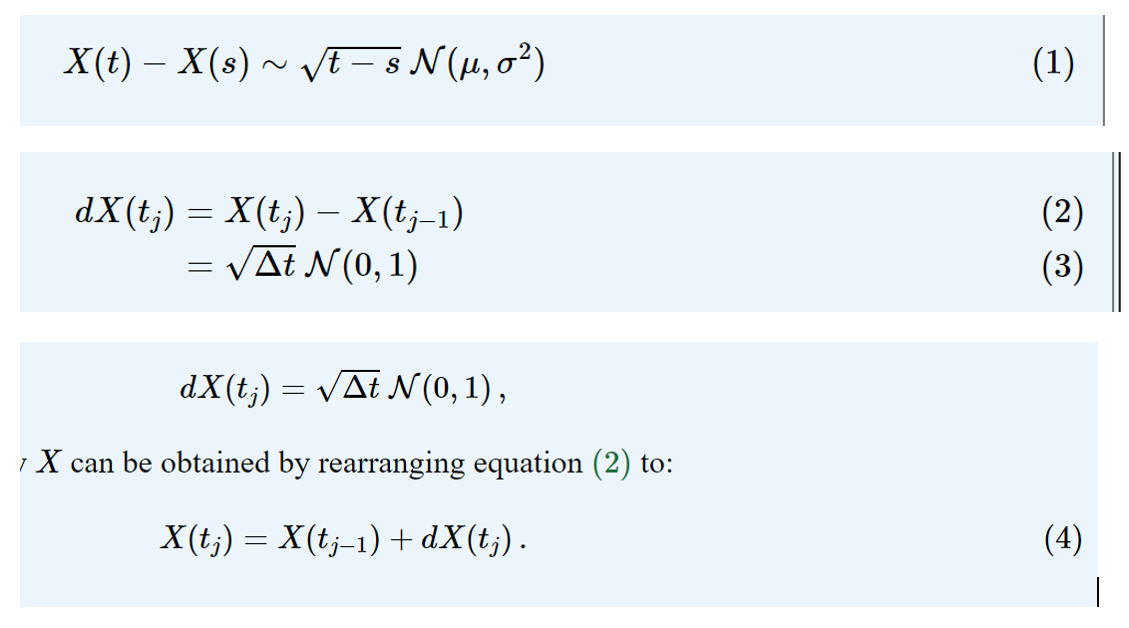



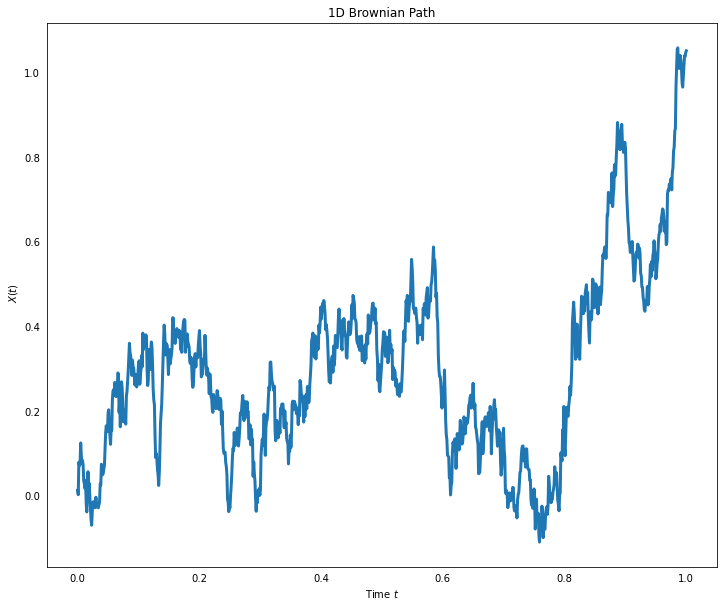

In [66]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(5)
plt.figure(figsize=(12,10))

T = 1
N = 1000 # Number of points, number of subintervals = N-1
dt = T/(N-1) # Time step
t = np.linspace(0,T,N)

# arrays for efficiency:
dX = [0]*N 
X = [0]*N

# Initialize:
dX[0] = np.sqrt(dt)*np.random.randn() # Eq. (3)
X[0] = dX[0]

for i in range(1,N):
    dX[i] = np.sqrt(dt)*np.random.randn() # Eq. (3)
    X[i] = X[i-1] + dX[i] # Eq. (4)


plt.plot(t, X)
plt.xlabel('Time $t$')
plt.ylabel(' $X(t)$')
plt.title('1D Brownian Path')
#axes = plt.gca()
#axes.set_xlim([0,T])
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
#plt.tight_layout()
plt.show()

# Uncomment to save the image
#fig.savefig('brownian_1d.png', dpi=600)

In [ ]:
# SIMULATION OF BROWNIAN MOTION

In [ ]:
# We simulate two independent one-dimensional Brownian processes to form a single two-dimensional Brownian process. 
#The (discrete) Brownian motion makes independent Gaussian jumps at each time step. 


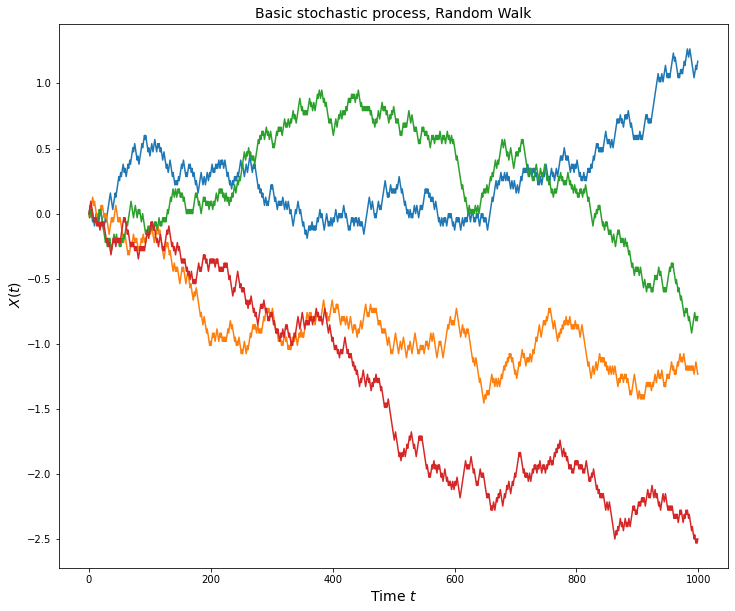

In [395]:
plt.figure(figsize=(12,10))
b = Brownian()
for i in range(4):
    plt.plot(b.gen_random_walk(1000))

plt.title('Basic stochastic process, Random Walk', fontsize=14)
plt.xlabel('Time $t$', fontsize=14)
plt.ylabel(' $X(t)$', fontsize=14)
plt.show()